<a href="https://www.kaggle.com/code/bhavkaur/simplified-titanic-dataset-baseline?scriptVersionId=133828836" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')

/kaggle/input/simplified-titanic-dataset/Simplified Titanic Dataset.csv


# Importing Dataset

In [2]:
data_filepath = "/kaggle/input/simplified-titanic-dataset/Simplified Titanic Dataset.csv"

In [3]:
tdata = pd.read_csv(data_filepath)

# Data Cleaning

In [4]:
tdata.head()

,age_grp,department,embarked,survived
0,40-49,3rd Class,Southampton,False
1,30-39,3rd Class,Southampton,True
2,10-19,3rd Class,Southampton,False
3,10-19,3rd Class,Southampton,False
4,20-29,Victualling,Southampton,False


In [5]:
tdata.columns

Index(['age_grp', 'department', 'embarked', 'survived'], dtype='object')

In [6]:
tdata.shape

(2240, 4)

In [7]:
tdata.drop_duplicates(inplace=True)
print("Done")

Done


In [8]:
tdata.isnull().sum()

age_grp       6
department    0
embarked      2
survived      0
dtype: int64

In [9]:
#tdata['embarked'].dropna()

In [10]:
tdata['age_grp'].dropna()

0       40-49
1       30-39
2       10-19
4       20-29
5       10-19
        ...  
1935      0-9
1946    40-49
1983    70-79
2064    60-69
2079    60-69
Name: age_grp, Length: 147, dtype: object

In [11]:
tdata.shape

(153, 4)

In [12]:
tdata['embarked'].info 

<bound method Series.info of 0       Southampton
1       Southampton
2       Southampton
4       Southampton
5       Southampton
           ...     
1946      Cherbourg
1983    Southampton
1993    Southampton
2064    Southampton
2079        Belfast
Name: embarked, Length: 153, dtype: object>

In [13]:
tdata['survived'].info

<bound method Series.info of 0       False
1        True
2       False
4       False
5        True
        ...  
1946    False
1983    False
1993    False
2064     True
2079    False
Name: survived, Length: 153, dtype: bool>

In [14]:
tdata['age_grp'].info

<bound method Series.info of 0       40-49
1       30-39
2       10-19
4       20-29
5       10-19
        ...  
1946    40-49
1983    70-79
1993      NaN
2064    60-69
2079    60-69
Name: age_grp, Length: 153, dtype: object>

## **Since, dtype in 'embarked' is object. Model of object cannot be traind so we will use label encoding. Similarly, for 'age_grp' and 'survived'.**

In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()

In [17]:
tdata['survived']= le.fit_transform(tdata['survived'])

In [18]:
tdata['survived']

0       0
1       1
2       0
4       0
5       1
       ..
1946    0
1983    0
1993    0
2064    1
2079    0
Name: survived, Length: 153, dtype: int64

In [19]:
tdata['survived'].unique()

array([0, 1])

In [20]:
tdata['age_grp']= le.fit_transform(tdata['age_grp'])

In [21]:
tdata['age_grp']

0       4
1       3
2       1
4       2
5       1
       ..
1946    4
1983    7
1993    8
2064    6
2079    6
Name: age_grp, Length: 153, dtype: int64

In [22]:
tdata['age_grp'].unique()

array([4, 3, 1, 2, 0, 6, 5, 7, 8])

In [23]:
tdata['embarked']= le.fit_transform(tdata['embarked'])

In [24]:
tdata['embarked']

0       3
1       3
2       3
4       3
5       3
       ..
1946    1
1983    3
1993    3
2064    3
2079    0
Name: embarked, Length: 153, dtype: int64

In [25]:
tdata['embarked'].unique()

array([3, 1, 0, 2, 4])

In [26]:
tdata['age_grp'].fillna(tdata['age_grp'].mean(), inplace=True)

In [27]:
tdata.age_grp.isnull().sum()

0

In [28]:
tdata['embarked'].fillna(tdata['embarked'].mean(), inplace=True)

In [29]:
tdata.embarked.isnull().sum()

0

# Exploratory Data Analysis

In [30]:
tdata.columns

Index(['age_grp', 'department', 'embarked', 'survived'], dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

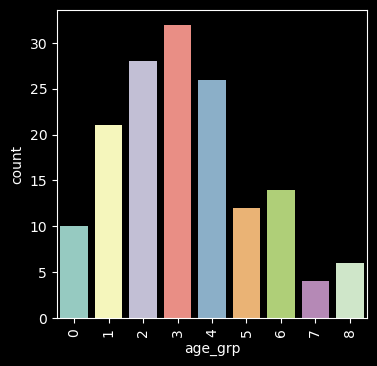

In [31]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data=tdata, x=tdata['age_grp'])
plt.xticks(rotation=90) #for clear x axis

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '3rd Class'),
  Text(1, 0, 'Victualling'),
  Text(2, 0, '2nd Class'),
  Text(3, 0, 'Engine'),
  Text(4, 0, 'A la Carte'),
  Text(5, 0, '1st Class'),
  Text(6, 0, 'Deck')])

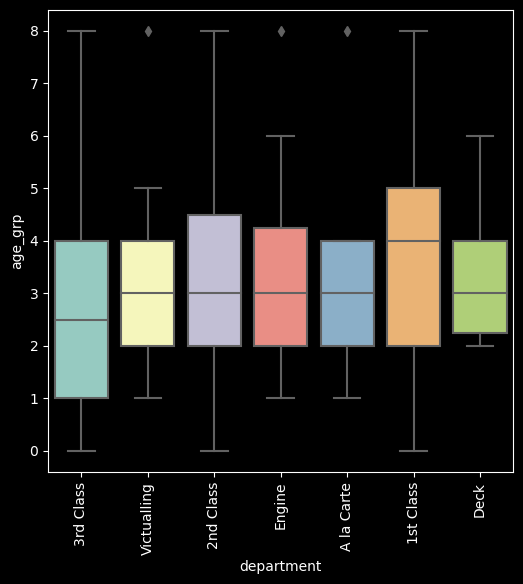

In [32]:
plt.figure(figsize=(6,6))
sns.boxplot(x='department', y='age_grp', data=tdata)
plt.xticks(rotation=90) #for clear x axis

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

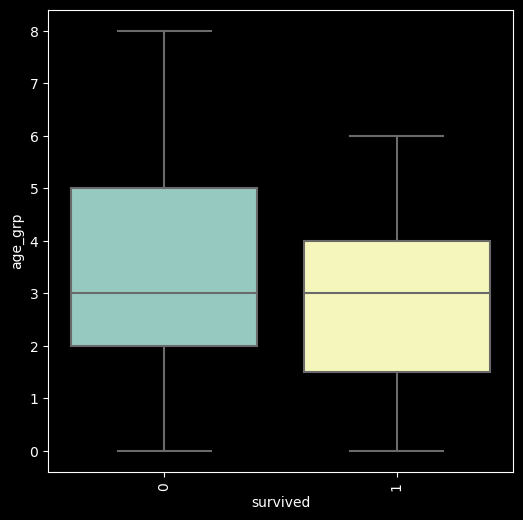

In [33]:
plt.figure(figsize=(6,6))
sns.boxplot(x='survived', y='age_grp', data=tdata)
plt.xticks(rotation=90) #for clear x axis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

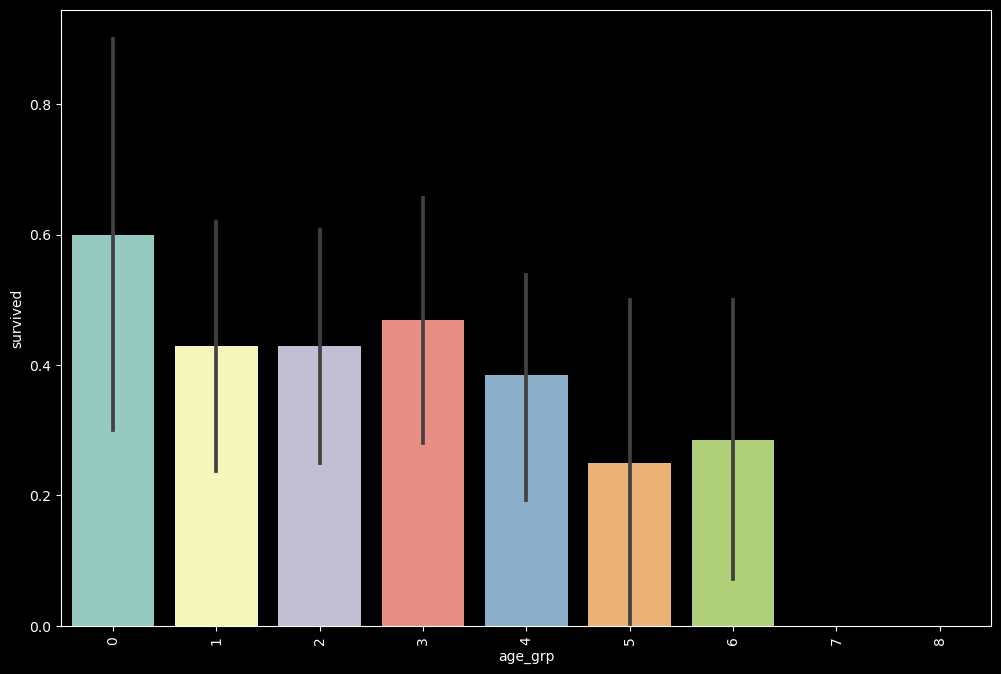

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x=tdata['age_grp'], y=tdata['survived'])
plt.xticks(rotation=90)

# Training Models

# Testing Models